In [2]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import os
from collections import OrderedDict
import sys
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
data_base = "C:\\Users\\wenyang.zhang\\Documents\\MySpace\\Workspace\\SalesAnalies\\data\\csv"

In [3]:
# 获取日数据，对于日数据进行删掉异常值和分组聚合计算处理
dic = OrderedDict()
index = 16
month = 1
while index > 4:
    file_name = "data({}).csv".format(index)
    #print("load data: ", file_name)
    file_path = os.path.join(data_base, file_name)
    data = pd.read_csv(file_path)
    data.drop(["Unnamed: 0", "Outlet No"], inplace=True, axis=1)
    groupData = data.groupby(["Region", "Sub Region", "Material No"])
    groupData = groupData.sum()
    dic[month] = groupData
    print("complete month: ", month, "group size: ", np.shape(groupData))
    index -= 1
    month += 1

complete month:  1 group size:  (1510, 31)
complete month:  2 group size:  (1715, 28)
complete month:  3 group size:  (1925, 31)
complete month:  4 group size:  (1969, 30)
complete month:  5 group size:  (2055, 31)
complete month:  6 group size:  (2035, 30)
complete month:  7 group size:  (2076, 31)
complete month:  8 group size:  (2021, 31)
complete month:  9 group size:  (2026, 30)
complete month:  10 group size:  (1992, 31)
complete month:  11 group size:  (2009, 30)
complete month:  12 group size:  (2003, 31)


In [4]:
# 测试一下pandas merge函数
data_all1 = dic[1]
data_all2 = dic[2]
joinColumns = ["Region", "Sub Region", "Material No"]
data_all = pd.merge(dic[1], dic[2], on=joinColumns)
data_all = pd.merge(data_all, dic[3], on=joinColumns)


In [5]:
# 拼接所有日的数据
data_all = dic[1]
for i in range(2, 13):
    data_all = pd.merge(data_all, dic[i], on=["Region", "Sub Region", "Material No"])
print(np.shape(data_all))
print(data_all.info())
# 修改异常值（小于0）
for item in data_all.values:
    item[item<0] = 0

data_all.head()

(891, 365)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (EOC, AnHui, 2022760) to (WOC, WOC4, 2043699)
Columns: 365 entries, 20180101 to 20181231
dtypes: float64(365)
memory usage: 2.5+ MB
None


20180101  20180102  20180103  20180104  \
Region Sub Region Material No                                           
EOC    AnHui      2022760          45.0      54.0      22.0       4.0   
                  2022861         114.0      67.0      30.0       8.0   
                  2024424           6.0       0.0       0.0       2.0   
                  2024425           2.0       1.0       1.0       0.0   
                  2024426           2.0       6.0       2.0       4.0   

                               20180105  20180106  20180107  20180108  \
Region Sub Region Material No                                           
EOC    AnHui      2022760          22.0      20.0       5.0      12.0   
                  2022861          33.0      48.0      94.0      56.0   
                  2024424           7.0       0.0      11.0       1.0   
                  2024425           0.0       6.0       9.0       8.0   
                  2024426           0.0       6.0       6.0       0.0   

                               20180109  20180110  ...  20181222  20181223  \
Region Sub Region Material No                      ...                       
EOC    AnHui      2022760          13.0      24.0  ...       0.0       0.0   
                  2022861          58.0       6.0  ...       0.0       0.0   
                  2024424           8.0       4.0  ...       7.0       2.0   
                  2024425           0.0       0.0  ...       8.0       5.0   
                  2024426           0.0       1.0  ...      15.0       0.0   

                               20181224  20181225  20181226  20181227  \
Region Sub Region Material No                                           
EOC    AnHui      2022760           0.0       0.0       0.0       0.0   
                  2022861           0.0       6.0       0.0       0.0   
                  2024424           0.0       1.0       2.0       0.0   
                  2024425           8.0       1.0       5.0       2.0   
                  2024426           0.0       0.0       0.0      16.0   

                               20181228  20181229  20181230  20181231  
Region Sub Region Material No                                          
EOC    AnHui      2022760           0.0       0.0       0.0       0.0  
                  2022861           0.0       0.0       0.0       0.0  
                  2024424           1.0       1.0       0.0       3.0  
                  2024425           1.0       1.0       3.0       2.0  
                  2024426           1.0       0.0       0.0       0.0  

[5 rows x 365 columns]

In [6]:
# 获取月份的全部数据（201801~201903）
file_name = "data(2).csv"
#print("load data: ", file_name)
file_path = os.path.join(data_base, file_name)
dataByMonth = pd.read_csv(file_path)
#print(dataByMonth.head())
dataByMonth_group = dataByMonth.groupby(["Region", "Sub Region", "Material NO"])
dataByMonth_group = dataByMonth_group.sum()
#print(np.shape(dataByMonth_group))
dataByMonth_group.fillna(0, inplace=True)
print(dataByMonth_group.head(20))

                               Unnamed: 0   Outlet No  201801  201802  201803  \
Region Sub Region Material NO                                                   
EOC    AnHui      2019178            1406    20048527     0.0     0.0     0.0   
                  2019181           16351   110179075     0.0     0.0     0.0   
                  2022688           28201   186306401    20.0    10.0    13.0   
                  2022723             901    13953170     0.0     0.0     0.0   
                  2022725           23386   137285982     0.0     0.0     0.0   
                  2022727            2317    20133848     0.0     1.0     0.0   
                  2022739           15641    62924809     0.0     0.0     6.0   
                  2022746            3991    40304949     0.0     0.0     0.0   
                  2022753            6692    41080018     5.0    -1.0     0.0   
                  2022757           98001   702591612   298.0   408.0   101.0   
                  2022760   

type(prodcut_oneyear_data):  <class 'numpy.ndarray'> [45. 54. 22.  4. 22. 20.  5. 12. 13. 24. 21.  8.  6. 11. 40. 38. 26. 30.
 33.  8.  6. 46.  1.  5. 10. 32. 12. 33. 36. 40. 19.  3. 15. 30. 21.  8.
 16. 41. 13. 20. 23.  6. 28. 11. 53. 11. 12.  5. 24.  2. 33.  4. 33. 29.
 39. 51. 27. 76.  0.  6.  6.  9. 17. 12.  1. 26.  8. 14. 19.  5. 14.  4.
  8. 12. 15. 32. 34. 53. 35. 25. 27. 19. 79. 31. 46. 18. 65. 89. 20. 71.
  5.  0.  0.  2. 23.  3.  3. 30.  0. 28. 12.  0. 22. 17. 21. 19. 18. 29.
 43. 10.  9.  0. 33.  0.  0. 17. 16. 16. 19.  0.  4.  0.  4.  1.  7.  3.
  0.  4.  4.  4. 32. 37.  7. 40.  1.  7. 24.  1. 16.  0. 50.  0.  0. 11.
  4.  1.  4.  5.  0.  6.  0.  0.  8.  1.  4. 27.  8. 12. 20.  0.  4.  8.
 19. 13. 21.  0.  0.  0.  0.  0.  0.  2.  0.  0. 20.  0. 20.  0.  1. 20.
  0.  0.  0.  8.  0.  0.  0.  0.  0.  0. 16.  0.  0.  3.  1. 12.  4.  0.
  2. 48.  0.  4.  0.  0.  2. 32.  0.  0.  8.  0.  7.  0.  1.  0.  0.  0.
  0.  0. 20.  0.  0.  0.  0.  0.  0.  4.  0. 12.  0.  0.  0.  0.  8.  0

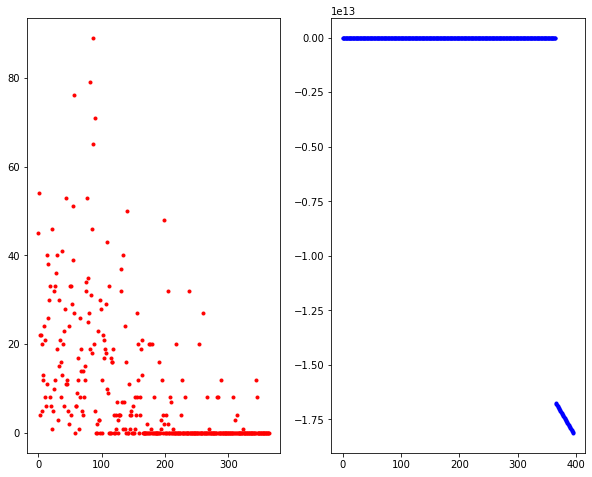

In [7]:
# 拟合日数据，做预测
# 发现有问题，就是拟合之后的预测值都是非常大，调整alpha值（0.0001->0.001)则会导致值非常小,难道是异常值导致的吗？
# 决定删掉异常值（outlier）
count = np.shape(data_all)[0]
#len(data_all.values[0])
data_all_arr = data_all.values
oneyear_day = list(range(365))
# print(oneyear_day)
colors = ['red', 'black', 'blue', 'brown', 'green']
plt.figure(figsize=(10, 8))
for i in range(1):
    dataByMonth_group.where
    prodcut_oneyear_data = data_all_arr[i]
    print("type(prodcut_oneyear_data): ", type(prodcut_oneyear_data), prodcut_oneyear_data)
    color_index = i % len(colors)
    plt.subplot(1,2,1)
    plt.plot(oneyear_day, prodcut_oneyear_data, "r.")
    sgd = SGDRegressor(random_state=42, alpha=0.001)
    x = np.array(oneyear_day).reshape(-1, 1)
    y = np.array(prodcut_oneyear_data).reshape(-1, 1)
    sgd.fit(x, y.ravel())
    jun_day = list(range(365, 365+31)) # 1月份的日期列表
    y_predict = sgd.predict(np.array(jun_day).reshape(-1, 1))
    print(y_predict)
    jun_sum = np.sum(y_predict)
    print("jun_sum: ", jun_sum)
    oneyear_day.extend(jun_day)
    #print(oneyear_day)
    print("oneyear_day length: ", len(oneyear_day))
    prodcut_oneyear_onemonth_data = prodcut_oneyear_data.tolist()
    prodcut_oneyear_onemonth_data.extend(y_predict.tolist())
    print("prodcut_oneyear_onemonth_data", prodcut_oneyear_onemonth_data)
    print("prodcut_oneyear_onemonth_data length: ", len(prodcut_oneyear_onemonth_data))
    plt.subplot(1,2,2)
    plt.plot(oneyear_day, prodcut_oneyear_onemonth_data, "b.")

sum(prodcut_oneyear_data): 
 1.4210854715202004e-14
sum(y_predict): 
 1.0


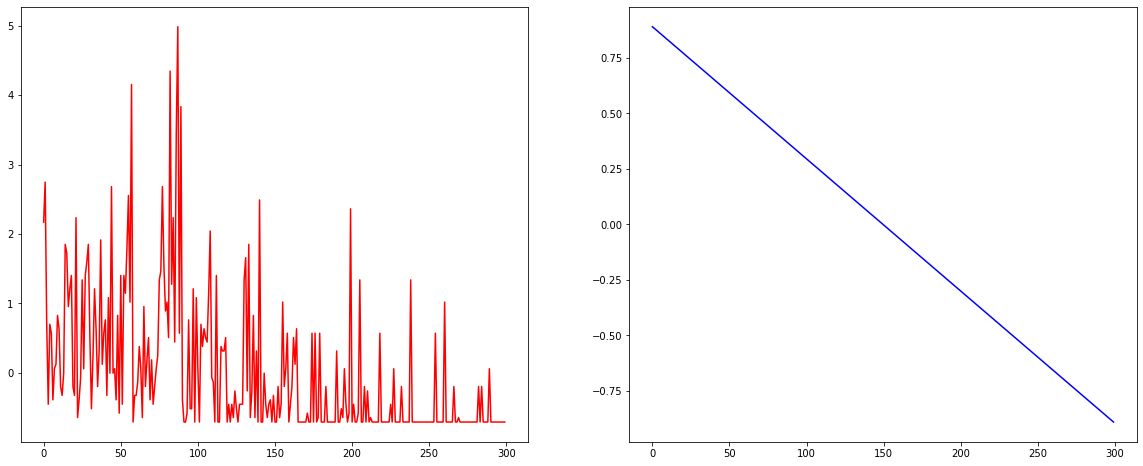

In [8]:
# 发现数据有问题，做各种尝试
count = np.shape(data_all)[0]
#len(data_all.values[0])
days = 300
data_all_arr = data_all.values
oneyear_day = list(range(days))
# print(oneyear_day)
colors = ['red', 'black', 'blue', 'brown', 'green']
plt.figure(figsize=(20, 8))
for i in range(1):
    dataByMonth_group.where
    prodcut_oneyear_data = data_all_arr[i]
    #print("type(prodcut_oneyear_data): ", type(prodcut_oneyear_data), prodcut_oneyear_data)
    color_index = i % len(colors)
    plt.subplot(1,2,1)
    prodcut_oneyear_data = prodcut_oneyear_data[:days] # 只取前10填数据
    prodcut_oneyear_data = StandardScaler().fit_transform(np.array(prodcut_oneyear_data).reshape(-1,1))
    print("sum(prodcut_oneyear_data): \n", prodcut_oneyear_data.sum())
    plt.plot(oneyear_day, prodcut_oneyear_data, "r-")
    sgd = LinearRegression()
    x = np.array(oneyear_day).reshape(-1, 1)
    y = np.array(prodcut_oneyear_data).reshape(-1, 1)
    sgd.fit(x, y.ravel())
    #jun_day = list(range(365, 365+31)) # 1月份的日期列表
    #oneyear_day.extend(jun_day)
    y_predict = sgd.predict(x)
    print("sum(y_predict): \n", np.abs(prodcut_oneyear_data.sum() -y_predict.sum())/prodcut_oneyear_data.sum())
    #jun_sum = np.sum(y_predict)
    #print("jun_sum: ", jun_sum)
    plt.subplot(1,2,2)
    plt.plot(x, y_predict, "b-")
    #print(oneyear_day)
#     print("oneyear_day length: ", len(oneyear_day))
#     prodcut_oneyear_onemonth_data = prodcut_oneyear_data.tolist()
#     prodcut_oneyear_onemonth_data.extend(y_predict.tolist())
#     print("prodcut_oneyear_onemonth_data", prodcut_oneyear_onemonth_data)
#     print("prodcut_oneyear_onemonth_data length: ", len(prodcut_oneyear_onemonth_data))
    

5.4130034232952475

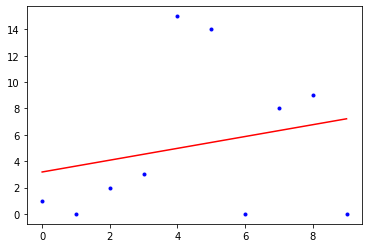

In [9]:
from sklearn import metrics
x = np.array(range(10))
y = np.array([1, 0, 2, 3,15, 14, 0,8,9,0])
plt.plot(x, y, "b.")
sgd.fit(x.reshape(-1,1), y.reshape(-1,1))
y_predict = sgd.predict(x.reshape(-1,1))
plt.plot(x, y_predict, "r-")
np.sqrt(metrics.mean_squared_error(y_predict, y))

In [10]:
type(dataByMonth_group)
group_count

NameError: name 'group_count' is not defined

avg_score:  [0.84544155 0.75212603 0.67753305]
ok count:  37
数据总数:  51


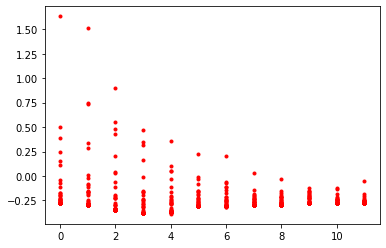

In [100]:
# 对于月份数据进行标准化看看效果
#group_count = np.shape(dataByMonth_group)[0]
group_count = 51 # 用于测试，指定个数
test_count = 3
x_month_range = range(12)
total_score = 0
y_salesForManth = dataByMonth_group.values
scaler = StandardScaler()
y_salesForManth = scaler.fit_transform(y_salesForManth)
i = 0
count = 0
ok_count = 0
ok_index = []
error_index = []
while(count < group_count):
    y_train = y_salesForManth[i, 2:(-1 * test_count)]
    y_test = y_salesForManth[i, (-1 * test_count):]
    #print("y_test: ", y_test)
    if(len(y_test[y_test == 0]) > 0):
        print("数据全0，跳过：", i)
        i += 1
        continue
    #print("发现一个有值的: ", y_test)
    #plt.plot(x_month_range, y_train, "b.")
    x2 = np.array(x_month_range).reshape(-1,1)
    y2 = np.array(y_train).reshape(-1,1)
    plt.plot(x2, y2, "r.")
    #sgd_reg2 = SGDRegressor(random_state=42)
    sgd_reg2 = LinearRegression()
    sgd_reg2.fit(x2, y2.ravel())

    y_predict_fit = sgd_reg2.predict(x2)
    #plt.plot(x2, y_predict_fit, "y-")

    y_predict_future = sgd_reg2.predict([[12], [13], [14]])
    acc = 1- np.abs((y_predict_future - y_test)/y_test)
    #print("y_predict_future: \n", y_predict_future, "y_test: \n", y_test)
    total_score += acc
    # 成功失败索引装进各自的list中
    if(len(acc[acc>0.8]) == 3):
        ok_count += 1
        ok_index.append(i)
    else:
        error_index.append(i)
    i+=1
    count +=1
        #print("01 ~ 03: \n", scaler.inverse_transform(y_salesForManth[i, :]))
        #print("y_test: \n", scaler.inverse_transform(y_test))
        #print("predict value: \n", scaler.inverse_transform(y_predict_future))
    #print("accuraty rate: ", acc)
    #print("total_score", total_score)
    
avg_score = total_score/group_count
print("avg_score: ", avg_score)
print("ok count: ", ok_count)
print("数据总数: ", i)

In [65]:
df = pd.DataFrame({'BoolCol': [1, 2, 3, 3, 4],'attr': [22, 33, 22, 44, 66]},
       index=[10,20,30,40,50])
print(df.columns.tolist())
a = df[(df.BoolCol==3)&(df.attr==22)].index.tolist()
print(a)
print("df.iloc[0,:]", df.loc[10])
print("pd.DataFrame(df.iloc[0,:])", pd.DataFrame(df.iloc[0,:]))

['BoolCol', 'attr']
[30]
df.iloc[0,:] BoolCol     1
attr       22
Name: 10, dtype: int64
pd.DataFrame(df.iloc[0,:])          10
BoolCol   1
attr     22


In [96]:
dataByMonth_group.head()
#np.shape(dataByMonth_group)
#dataByMonth.index
dataByMonth_group.index

MultiIndex(levels=[['EOC', 'NOC', 'SOC', 'WOC'], ['AnHui', 'EOC1', 'EOC2', 'EOC3', 'EOC4', 'EOC5', 'EOC6', 'NOC1', 'NOC2', 'NOC3', 'NOC4', 'SOC1', 'SOC2', 'SOC3', 'SOC4', 'WOC1', 'WOC2', 'WOC3', 'WOC4'], [2008021, 2009542, 2017835, 2019178, 2019181, 2020924, 2022688, 2022721, 2022722, 2022723, 2022724, 2022725, 2022727, 2022732, 2022735, 2022736, 2022739, 2022743, 2022746, 2022749, 2022750, 2022753, 2022757, 2022760, 2022764, 2022767, 2022853, 2022854, 2022855, 2022858, 2022861, 2022864, 2023614, 2024424, 2024425, 2024426, 2024427, 2024428, 2024574, 2024575, 2024576, 2024629, 2024922, 2025522, 2027091, 2027094, 2027955, 2027990, 2028119, 2028121, 2028123, 2028455, 2028457, 2029562, 2029564, 2029565, 2030129, 2030130, 2030131, 2030132, 2030147, 2030148, 2030149, 2030150, 2030322, 2030323, 2030324, 2030326, 2030842, 2030916, 2030919, 2030920, 2030921, 2031408, 2032158, 2032159, 2032737, 2032738, 2032739, 2032741, 2032743, 2033677, 2033680, 2034052, 2034054, 2034887, 2035018, 2035100, 203

In [99]:
path = os.path.join(data_base, "dataByMonth_group.csv")
# y_salesForManth[0:50]
# np.shape(dataByMonth_group)
# dataByMonth_group.columns.tolist()
# print(y_salesForManth[0])
df = pd.DataFrame(data=y_salesForManth, columns=dataByMonth_group.columns.tolist())
df.to_csv(path)

In [72]:
dataByMonth_group

Unnamed: 0    Outlet No  201801  201802  \
Region Sub Region Material NO                                            
EOC    AnHui      2019178            1406     20048527     0.0     0.0   
                  2019181           16351    110179075     0.0     0.0   
                  2022688           28201    186306401    20.0    10.0   
                  2022723             901     13953170     0.0     0.0   
                  2022725           23386    137285982     0.0     0.0   
                  2022727            2317     20133848     0.0     1.0   
                  2022739           15641     62924809     0.0     0.0   
                  2022746            3991     40304949     0.0     0.0   
                  2022753            6692     41080018     5.0    -1.0   
                  2022757           98001    702591612   298.0   408.0   
                  2022760          172364   1240323573   682.0   629.0   
                  2022764            8896     55498872     0.0     1.0   
                  2022767           25345    143581282     0.0     0.0   
                  2022854            5956     21003877     0.0     0.0   
                  2022855            2000     27906379     8.0     1.0   
                  2022858            4051     20751796     1.0     0.0   
                  2022861          347614   2078935964  1503.0  1458.0   
                  2022864          166558    921889121    88.0    22.0   
                  2023614           16174     62356073     0.0     0.0   
                  2024424          260587   1695576491   149.0   240.0   
                  2024425          459518   2401057820   128.0   288.0   
                  2024426          185509   1115295958   117.0    90.0   
                  2024427          463587   2441931323   202.0   304.0   
                  2024428          160420    759796873     0.0     0.0   
                  2024574           10871     41973012     0.0     0.0   
                  2024575           49248    310645654     3.0    18.0   
                  2024576           22177    103913812     2.0     6.0   
                  2024629           66441    340327341    47.0     3.0   
                  2024922           22027    103807169     4.0    17.0   
                  2025522          391280   2176295365   588.0   493.0   
...                                   ...          ...     ...     ...   
WOC    WOC4       2044492       157199977   7543479854     0.0     0.0   
                  2044494       287021523  14203768997     0.0     0.0   
                  2044496        64718150   3086520955     0.0     0.0   
                  2044499       292486828  14472966595     0.0     0.0   
                  2044519       304555183  15099851496     0.0    90.0   
                  2044522       197993526   9836340131     0.0     0.0   
                  2044525       105160111   5213864725     0.0     0.0   
                  2044543       176543202   8614947617     0.0     0.0   
                  2044545       108996408   5348498782     0.0     0.0   
                  2044596       186753876   9041853716     0.0     0.0   
                  2044885       124852462   6363277828     0.0     0.0   
                  2045543        14690443    712452346     0.0     0.0   
                  2045544       140135050   6841376289     0.0    37.0   
                  2045717        31240778   1553817703     0.0     0.0   
                  2047126        73017275   3598493209     0.0     0.0   
                  2047659        55801937   2841387117     0.0     0.0   
                  2047664       155857325   7520645040     0.0     0.0   
                  2047729       147761292   7007881697     0.0     0.0   
                  2047731        74652227   3428232381     0.0     0.0   
                  2047751         2672753    104179815     0.0     0.0   
                  2047754         7406320    384023752     0.0     0.0   
                  2047755        74